# Project 2 - Ames Housing Data and Kaggle Challenge

# Part 1 - Cleaning training data

# Problem Statement

As real estate analysts in Iowa, we are responsible for managing our organization's real estate holdings.

We are tasked with understanding real estate market trends and to minimize current and future real estate holding risks.

We will be conducting data analysis on the Iowa real estate market and determine which are the factors that affects property prices.

The purpose of this analysis is to better understand a property price and provide suitable insights to management and potential buyers of the organization's real estate.

# Executive Summary

Part 1: <br>
1. Importing all necessary libraries <br>
2. Importing training dataset "train.csv". <br>
3. Data Cleaning <br>
4. EDA <br>

Part 2:
1. Importing all necessary libraries <br>
2. Importing training dataset "test.csv". <br>
3. Data Cleaning <br>
4. EDA <br>

Part 3: <br>
1. Feature Engineering <br>
2. Modelling, L1 & L2 regularization <br>
3. Residuals and model evaluation <br>
4. Results interpretation <br>

readme.md: <br>
1. Recommendations <br>
2. Future steps forward for the project <br>
3. Research about the topic
4. Sources <br>

# 1. Importing all necessary libraries

In [1]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import scipy.stats
from scipy import stats
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
traindata = pd.read_csv('datasets/train.csv')
#testdata = pd.read_csv('datasets/test.csv')

In [3]:
#traindata = pd.concat([traindata, testdata])

In [4]:
traindata.shape

(2051, 81)

In [5]:
traindata.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [6]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7]:
missing = pd.DataFrame(traindata.isnull().sum(), columns=['value'])
missing.T

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
value,0,0,0,0,330,0,0,1911,0,0,...,0,0,2042,1651,1986,0,0,0,0,0


In [8]:
missing1 = missing[missing['value'] != 0]

In [9]:
missing1

,value
Lot Frontage,330
Alley,1911
Mas Vnr Type,22
Mas Vnr Area,22
Bsmt Qual,55
Bsmt Cond,55
Bsmt Exposure,58
BsmtFin Type 1,55
BsmtFin SF 1,1
BsmtFin Type 2,56


In [10]:
missing1.shape

(26, 1)

In [11]:
traindata.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


# Data Exploring Results

Abnormal values:
Min - There are no abnormal or negative values.
Max - There are no abnormally high values except: PID
Outliers - There are no abnormal outliers except: PID (which seems to have no range)

Missing values:
1. There are 26 rows with missing data.
2. Looking at the missing data, it seems like there is a mix of true missing data where it is not entered and also data where it is null because it has no such feature.

In [12]:
missing1

,value
Lot Frontage,330
Alley,1911
Mas Vnr Type,22
Mas Vnr Area,22
Bsmt Qual,55
Bsmt Cond,55
Bsmt Exposure,58
BsmtFin Type 1,55
BsmtFin SF 1,1
BsmtFin Type 2,56


# Understanding Missing Data

I'll name the dataframe 'DataFrame1' for ease of reference. <br>
DataFrame1:

In [13]:
traindata[missing1.index].head(3)

,Lot Frontage,Alley,Mas Vnr Type,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,...,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Pool QC,Fence,Misc Feature
0,NaN,NaN,BrkFace,289.0,TA,TA,No,GLQ,533.0,Unf,...,Attchd,1976.0,RFn,2.0,475.0,TA,TA,NaN,NaN,NaN
1,43.0,NaN,BrkFace,132.0,Gd,TA,No,GLQ,637.0,Unf,...,Attchd,1997.0,RFn,2.0,559.0,TA,TA,NaN,NaN,NaN
2,68.0,NaN,None,0.0,TA,TA,No,GLQ,731.0,Unf,...,Detchd,1953.0,Unf,1.0,246.0,TA,TA,NaN,NaN,NaN


From DataFrame1, we can see that the missing data might not actually be literal missing, but rather it lacks such a feature hence it is empty.

# Correcting NaN Data

In [14]:
datatype1 = pd.DataFrame(missing1.T.dtypes, columns=['data'])

In [15]:
mdata = missing1.merge(datatype1, left_index=True, right_index=True)

In [16]:
mdata

,value,data
Lot Frontage,330,int64
Alley,1911,int64
Mas Vnr Type,22,int64
Mas Vnr Area,22,int64
Bsmt Qual,55,int64
Bsmt Cond,55,int64
Bsmt Exposure,58,int64
BsmtFin Type 1,55,int64
BsmtFin SF 1,1,int64
BsmtFin Type 2,56,int64


## 1. Lot Frontage

In [17]:
traindata['Lot Frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

To fill up 'Lot Frontage' with 0 to manage NaN data as the column is made up of a float datatype. <br>
And it is likely that NaN in this scenario is referring to 'No Lot Frontage' instead of 'Missing Data'.

In [18]:
traindata['Lot Frontage'] = traindata['Lot Frontage'].fillna(0)

In [19]:
traindata['Lot Frontage'].isnull().sum()

0

## 2. Alley

In [20]:
traindata['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

To fill up 'Alley' Nan data with 'NA' (string) to indicate that there's none.

In [21]:
traindata['Alley'] = traindata['Alley'].fillna('NA')

In [22]:
traindata['Alley'].isnull().sum()

0

## 3. Mas Vnr Type & Mas Vnr Area

Both of these has the same number of missing data and has the same name. <br>
It is likely that these 2 categories are related to each other, and it is not missing data, rather the feature does not exist.

In [23]:
traindata['Mas Vnr Type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

###### As there is 'None' and NaN, the data has to be investigated further.

In [24]:
traindata[traindata['Mas Vnr Type'] == 'None'].index

Int64Index([   2,    3,    4,    5,    8,   11,   12,   14,   15,   16,
            ...
            2035, 2037, 2040, 2042, 2043, 2046, 2047, 2048, 2049, 2050],
           dtype='int64', length=1218)

In [25]:
traindata[traindata['Mas Vnr Type'] == 'None']['Mas Vnr Area'].describe()

count    1218.000000
mean        0.521346
std        12.849932
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       344.000000
Name: Mas Vnr Area, dtype: float64

In [26]:
traindata[traindata['Mas Vnr Type'] == 'None']['Mas Vnr Area'].unique()

array([  0.,   1., 288., 344.])

###### Even when 'Mas Vnr Type' == 'None',  'Mas Vnr Area' contains data.
###### Hence, it would be incorrect if the NaN data is entered is 'NA'.

In [27]:
traindata[traindata['Mas Vnr Type'].isnull()].index

Int64Index([  22,   41,   86,  212,  276,  338,  431,  451,  591,  844,  913,
             939, 1025, 1244, 1306, 1430, 1434, 1606, 1699, 1815, 1820, 1941],
           dtype='int64')

In [28]:
traindata[traindata['Mas Vnr Area'].isnull()].index

Int64Index([  22,   41,   86,  212,  276,  338,  431,  451,  591,  844,  913,
             939, 1025, 1244, 1306, 1430, 1434, 1606, 1699, 1815, 1820, 1941],
           dtype='int64')

###### However, when data is NaN, the indexes are the same.
Hence, the NaN values will be replaced with 'others', with the 'Mas Vnr Area' replaced with -1.0 indicating 'others' category.

In [29]:
traindata['Mas Vnr Type'] = traindata['Mas Vnr Type'].fillna('others')

In [30]:
traindata['Mas Vnr Area'] = traindata['Mas Vnr Area'].fillna(-1.0)

In [31]:
print(f"{traindata['Mas Vnr Type'].isnull().sum()}; Type null data count")
print(f"{traindata['Mas Vnr Area'].isnull().sum()}; Area null data count")

0; Type null data count
0; Area null data count


## 4. Bsmt and its sub categories

Filtering columns by regex expression "Bsmt":

In [32]:
bsmt_df = traindata.filter(regex=("Bsmt"))
bsmt_df.head(3)

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
0,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,0.0,0.0
1,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,1.0,0.0
2,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,1.0,0.0


In [33]:
bsmt_df.columns

Index(['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'],
      dtype='object')

In [34]:
bsmt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bsmt Qual       1996 non-null   object 
 1   Bsmt Cond       1996 non-null   object 
 2   Bsmt Exposure   1993 non-null   object 
 3   BsmtFin Type 1  1996 non-null   object 
 4   BsmtFin SF 1    2050 non-null   float64
 5   BsmtFin Type 2  1995 non-null   object 
 6   BsmtFin SF 2    2050 non-null   float64
 7   Bsmt Unf SF     2050 non-null   float64
 8   Total Bsmt SF   2050 non-null   float64
 9   Bsmt Full Bath  2049 non-null   float64
 10  Bsmt Half Bath  2049 non-null   float64
dtypes: float64(6), object(5)
memory usage: 176.4+ KB


###### By understanding the relationship that Total Bsmt SF = BsmtFin SF 1 + Bsmt Unf SF, it is likely that most of the NaN is coming from the data where Total Bsmt SF == 0 where the Bsmt feature does not exist.

In [35]:
bsmt_0 = bsmt_df[bsmt_df['Total Bsmt SF'] == 0]

In [36]:
bsmt_0.describe()

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
count,54.0,54.0,54.0,54.0,53.0,53.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
bsmt_0.head(3)

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [38]:
bsmt_0.columns

Index(['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'],
      dtype='object')

###### Columns: 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2' NaN values will be replaced with 'NA' to indicate that there is no such feature.

In [39]:
bsmt_nan = bsmt_0[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']]

In [40]:
bsmt_nan.fillna('NA').head(3)

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
12,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
93,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
114,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0


In [41]:
pd.DataFrame(bsmt_nan.isnull().sum(), columns=['bsmt_null'])

,bsmt_null
Bsmt Qual,54
Bsmt Cond,54
Bsmt Exposure,54
BsmtFin Type 1,54
BsmtFin SF 1,0
BsmtFin Type 2,54
BsmtFin SF 2,0
Bsmt Unf SF,0
Total Bsmt SF,0
Bsmt Full Bath,1


After zeroing the NaN for ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
       
There remains NaN in the data. <br>
These data needs to be investigated further.

In [42]:
bsmt_nan_leftovers = bsmt_nan[bsmt_nan.isna().any(axis=1)]

In [43]:
bsmt_nan_leftovers.shape

(54, 11)

In [44]:
bsmt_nan_leftovers.describe()

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
count,54.0,54.0,54.0,54.0,53.0,53.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


The leftover NaN data are all empty, likely signifying that these features does not exist. <br>
Therefore it is safe to replace data with 'NA' or 0.0 according to the column datatype.

### Replacing Bsmt NaN data

In [45]:
bsmt_df.columns

Index(['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'],
      dtype='object')

###### 1. Bsmt Qual

In [46]:
bsmt_df['Bsmt Qual'].unique()

array(['TA', 'Gd', 'Fa', nan, 'Ex', 'Po'], dtype=object)

In [47]:
bsmt_df['Bsmt Qual'] = bsmt_df['Bsmt Qual'].fillna('NA')

In [48]:
bsmt_df['Bsmt Qual'].isnull().sum()

0

###### 2. Bsmt Cond

In [49]:
bsmt_df['Bsmt Cond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'], dtype=object)

In [50]:
bsmt_df['Bsmt Cond'] = bsmt_df['Bsmt Cond'].fillna('NA')

In [51]:
bsmt_df['Bsmt Cond'].isnull().sum()

0

###### 3. Bsmt Exposure

In [52]:
bsmt_df['Bsmt Exposure'].unique()

array(['No', 'Gd', 'Av', nan, 'Mn'], dtype=object)

In [53]:
bsmt_df['Bsmt Exposure'] = bsmt_df['Bsmt Exposure'].fillna('NA')

In [54]:
bsmt_df['Bsmt Cond'].isnull().sum()

0

###### 4. BsmtFin Type 1

In [55]:
bsmt_df['BsmtFin Type 1'].unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', nan, 'BLQ', 'LwQ'], dtype=object)

In [56]:
bsmt_df['BsmtFin Type 1'] = bsmt_df['BsmtFin Type 1'].fillna('NA')

In [57]:
bsmt_df['BsmtFin Type 1'].isnull().sum()

0

###### 5. BsmtFin SF 1

In [58]:
bsmt_df['BsmtFin SF 1'].unique()

array([5.330e+02, 6.370e+02, 7.310e+02, 0.000e+00, 2.470e+02, 5.470e+02,
       1.000e+03, 2.920e+02, 6.500e+02, 3.870e+02, 3.930e+02, 8.130e+02,
       2.400e+01, 6.510e+02, 4.920e+02, 1.158e+03, 9.350e+02, 1.056e+03,
       1.312e+03, 5.530e+02, 6.060e+02, 1.104e+03, 4.370e+02, 4.410e+02,
       1.288e+03, 5.480e+02, 7.050e+02, 9.160e+02, 4.200e+02, 8.300e+02,
       1.386e+03, 1.097e+03, 9.060e+02, 2.100e+02, 4.080e+02, 3.540e+02,
       3.530e+02, 6.220e+02, 7.900e+02, 1.760e+02, 3.710e+02, 3.680e+02,
       4.860e+02, 8.500e+01, 1.380e+02, 5.240e+02, 6.400e+01, 1.092e+03,
       3.600e+02, 1.720e+02, 2.060e+02, 2.460e+02, 1.600e+01, 1.346e+03,
       7.000e+02, 6.550e+02, 4.430e+02, 1.680e+02, 1.904e+03, 2.400e+02,
       8.640e+02, 4.150e+02, 8.330e+02, 3.770e+02, 2.800e+02, 8.280e+02,
       7.620e+02, 3.600e+01, 1.014e+03, 6.000e+01, 5.880e+02, 4.380e+02,
       1.153e+03, 5.270e+02, 1.337e+03, 3.480e+02, 1.044e+03, 6.900e+02,
       9.620e+02, 6.410e+02, 1.110e+03, 4.210e+02, 

In [59]:
bsmt_df['BsmtFin SF 1'] = bsmt_df['BsmtFin SF 1'].fillna(0)

In [60]:
bsmt_df['BsmtFin SF 1'].dtypes

dtype('float64')

In [61]:
bsmt_df['BsmtFin SF 1'].isnull().sum()

0

###### 6. BsmtFin Type 2

In [62]:
bsmt_df['BsmtFin Type 2'].unique()

array(['Unf', 'Rec', nan, 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object)

In [63]:
bsmt_df['BsmtFin Type 2'] = bsmt_df['BsmtFin Type 2'].fillna('NA')

In [64]:
bsmt_df['BsmtFin Type 2'].isnull().sum()

0

###### 7. BsmtFin SF 2

In [65]:
bsmt_df['BsmtFin SF 2'].unique()

array([   0.,  713.,  117., 1057.,  173.,  290.,  420.,  469.,   42.,
        955.,  483.,  147.,  596.,  206.,  382.,  546.,  202.,  228.,
        661.,  279.,  106.,  321.,  232.,  956.,  670.,  915.,  116.,
       1080.,   80.,  215.,  144.,  590.,  149.,  281.,  297.,  612.,
        468.,  891.,  622.,  507.,  432.,  852.,  108.,  128.,  294.,
       1061.,  127.,  712.,  125.,  324.,  252.,  247.,   72.,  150.,
        906.,  555.,   38.,  180.,   64.,  288.,  311.,  227.,  842.,
        620.,  181.,  162.,  354.,  539.,  551.,  110.,  219.,  547.,
        186.,  774.,  123.,  613.,  167.,  230.,  495.,  208.,  308.,
        604.,  154.,  334.,  417.,  624.,  442.,  497.,  211., 1474.,
        532.,  132.,  829., 1127.,  435.,  174.,  105.,  375.,  608.,
       1039., 1063.,  264.,  270.,  259.,  531.,  488.,  500.,   41.,
        177.,  169.,  344.,  869.,  182.,  768.,  119.,  619.,  345.,
        645.,  278.,  113.,  466.,  522.,    6.,  377.,   92.,  859.,
        479.,  239.,

In [66]:
bsmt_df['BsmtFin SF 2'] = bsmt_df['BsmtFin SF 2'].fillna(0)

In [67]:
bsmt_df['BsmtFin SF 2'].isnull().sum()

0

###### 8. Bsmt Unf SF

In [68]:
bsmt_df['Bsmt Unf SF'].unique()

array([ 192.,  276.,  326.,  384.,  676.,  557.,    0.,  188.,  632.,
        390.,   96.,  815.,  147., 1327., 1430.,  624.,  470.,  660.,
        732.,  402.,  343., 1209.,  233.,  141.,  224.,  336.,  957.,
        672., 1420.,  792.,  507.,  417.,  160.,   36., 1139.,  570.,
        136.,  690., 1050.,  134.,  398.,  156.,  776.,  412.,  764.,
        403.,  500.,  133.,  370.,  216.,  292.,  190.,  450.,  778.,
        628., 1120.,  328.,  576.,  727.,  914.,  285.,  976., 1802.,
       1346.,  162., 1140.,  970., 1616.,  768.,  872.,  520.,  662.,
        936.,  448.,  312.,  876.,  325., 1251.,  551.,  588.,  320.,
        599.,   98.,  122.,  138., 1081.,  550.,  250.,  408.,  547.,
        180.,  245.,  114.,  191.,   32.,  595.,  269.,  978., 1078.,
       1116.,  308., 1290.,  587.,  107.,  706.,  565.,  161., 1008.,
        584.,  707.,  637.,  113.,  367.,  677.,  466.,  100.,  396.,
         25.,  780., 1530., 1528.,  744.,  381.,  218.,  610.,  459.,
        606.,  144.,

In [69]:
bsmt_df['Bsmt Unf SF'] = bsmt_df['Bsmt Unf SF'].fillna(0)

In [70]:
bsmt_df['Bsmt Unf SF'].isnull().sum()

0

###### 9. Total Bsmt SF

In [71]:
bsmt_df['Total Bsmt SF'].unique()

array([ 725.,  913., 1057.,  384.,  676., 1517.,  547., 1188.,  924.,
       1040.,  483., 1208.,    0.,  960., 1351., 1430.,  624., 1121.,
        660.,  756.,  894., 1501., 1209., 1168., 1056., 1453.,  942.,
        957.,  672., 2524.,  792., 1494.,  948., 1705.,  160.,  757.,
       1844., 1242.,  990., 1256., 2076., 1097., 1050.,  608.,  984.,
        776.,  764., 1122., 1392.,  546.,  216.,  663.,  600.,  936.,
        916., 1152., 1184., 1420., 1382., 1120.,  531.,  976., 1802.,
       1362., 1508., 1840.,  655.,  970., 1616.,  768.,  872.,  520.,
       1105.,  616., 2216.,  876.,  864., 1189., 1666., 1176.,  928.,
       1288., 1427.,  860.,  754., 1141., 1138., 1561., 1342., 1884.,
        528., 1426.,  245.,  804., 1153.,  673.,  714.,  690.,  978.,
       1078., 1116., 1140., 1466., 1614.,  988.,  996., 1202., 1008.,
        720.,  994.,  707.,  637.,  813., 1055.,  855., 1719.,  780.,
       1554., 1528.,  982., 1172., 1642.,  884., 1422.,  985.,  888.,
       1992., 1478.,

In [72]:
bsmt_df['Total Bsmt SF'] = bsmt_df['Total Bsmt SF'].fillna(0)

In [73]:
bsmt_df['Total Bsmt SF'].isnull().sum()

0

###### 10. Bsmt Full Bath

In [74]:
bsmt_df['Bsmt Full Bath'].unique()

array([ 0.,  1.,  2., nan,  3.])

Bsmt Full Bath column is on a scale, hence the value given will be -1 so as not to mix up with 0 where the feature actually exists. <br>

In [75]:
bsmt_df['Bsmt Full Bath'] = bsmt_df['Bsmt Full Bath'].fillna(-1)

In [76]:
bsmt_df['Bsmt Full Bath'].isnull().sum()

0

###### 11. Bsmt Half Bath

In [77]:
bsmt_df['Bsmt Half Bath'].unique()

array([ 0.,  1., nan,  2.])

Bsmt Half Bath column is on a scale, hence the value given will be -1 so as not to mix up with 0 where the feature actually exists. <br>

In [78]:
bsmt_df['Bsmt Half Bath'] = bsmt_df['Bsmt Half Bath'].fillna(-1)

In [79]:
bsmt_df['Bsmt Half Bath'].isnull().sum()

0

##### Checking bsmt_df

In [80]:
bsmt_df.isnull().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
dtype: int64

In [81]:
bsmt_df.shape

(2051, 11)

There are no more null values for Bsmt data, and the shape and index remained unchanged.

### Dropping and merging new non-null dataframe into traindata dataframe

In [82]:
traindata = traindata.drop(columns=['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'])

In [83]:
traindata = traindata.merge(bsmt_df, left_index = True, right_index = True)

In [84]:
traindata.shape

(2051, 81)

In [85]:
traindata.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,...,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,0.0,0.0
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,1.0,0.0
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,1.0,0.0


## 5. Fireplace Qu

In [86]:
traindata['Fireplace Qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

Replacing 'Fireplace Qu' with 'NA' since this feature does not exist.

In [87]:
traindata['Fireplace Qu'] = traindata['Fireplace Qu'].fillna('NA')

In [88]:
traindata['Fireplace Qu'].isnull().sum()

0

## 6. Garage and its sub categories

In [89]:
garage_df = traindata.filter(regex=("Garage"))
garage_df.head(3)

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,Attchd,1976.0,RFn,2.0,475.0,TA,TA
1,Attchd,1997.0,RFn,2.0,559.0,TA,TA
2,Detchd,1953.0,Unf,1.0,246.0,TA,TA


In [90]:
garage_df.columns

Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

In [91]:
garage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Type    1938 non-null   object 
 1   Garage Yr Blt  1937 non-null   float64
 2   Garage Finish  1937 non-null   object 
 3   Garage Cars    2050 non-null   float64
 4   Garage Area    2050 non-null   float64
 5   Garage Qual    1937 non-null   object 
 6   Garage Cond    1937 non-null   object 
dtypes: float64(3), object(4)
memory usage: 112.3+ KB


In [92]:
garage_df.isnull().sum()

Garage Type      113
Garage Yr Blt    114
Garage Finish    114
Garage Cars        1
Garage Area        1
Garage Qual      114
Garage Cond      114
dtype: int64

In [93]:
garage_df.describe()

,Garage Yr Blt,Garage Cars,Garage Area
count,1937.000000,2050.000000,2050.000000
mean,1978.707796,1.776585,473.671707
std,25.441094,0.764537,215.934561
min,1895.000000,0.000000,0.000000
25%,1961.000000,1.000000,319.000000
50%,1980.000000,2.000000,480.000000
75%,2002.000000,2.000000,576.000000
max,2207.000000,5.000000,1418.000000


Garage Area has a <b>minimum</b> value of 0.00 likely signifying these properties with 0 area has no garage. <br>

In [94]:
garage_0 = garage_df[garage_df['Garage Area'] == 0]

In [95]:
garage_0.describe()

,Garage Yr Blt,Garage Cars,Garage Area
count,0.0,113.0,113.0
mean,NaN,0.0,0.0
std,NaN,0.0,0.0
min,NaN,0.0,0.0
25%,NaN,0.0,0.0
50%,NaN,0.0,0.0
75%,NaN,0.0,0.0
max,NaN,0.0,0.0


From the description of the data above, it can be seen that Garage Area of 0 contains empty values or NaN values.

In [96]:
garage_0.shape

(113, 7)

In [97]:
garage_df[garage_df.isna().any(axis=1)].shape

(114, 7)

From the shape of the dataframe, we can see that there is one row where Garage Area is not equals to 0.

In [98]:
garage_nulls = garage_df[garage_df.isna().any(axis=1)]

In [99]:
garage_nulls1 = garage_nulls[garage_nulls['Garage Area'] != 0]
garage_nulls1

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


From the row exception shown above, it can be seen that 'Detched' is an outlier category in this particular case where other columns such as 'Garage Yr Blt', 'Garage Cars' etc are also NaN. <br>
It likely signifies that such a feature does not exist. <br>

Hence, 'garage_df' NaN will be input as 'NA' as well as the category exception above.

###### Checking Garage Columns

In [100]:
garage_df.columns

Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

###### 1. Garage Type

In [101]:
garage_df['Garage Type'][1712] = 'NA'

In [102]:
garage_df['Garage Type'] = garage_df['Garage Type'].fillna('NA')

In [103]:
garage_df['Garage Type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'NA', '2Types',
       'CarPort'], dtype=object)

In [104]:
garage_df['Garage Type'].isnull().sum()

0

###### 2. Garage Yr Blt

In [105]:
garage_df['Garage Yr Blt'].unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
       1895., 1919.])

In [106]:
garage_df['Garage Yr Blt'] = garage_df['Garage Yr Blt'].fillna(0)

In [107]:
garage_df['Garage Yr Blt'].isnull().sum()

0

###### 3. Garage Finish

In [108]:
garage_df['Garage Finish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [109]:
garage_df['Garage Finish'] = garage_df['Garage Finish'].fillna('NA')

In [110]:
garage_df['Garage Finish'].isnull().sum()

0

###### 4. Garage Cars

In [111]:
garage_df['Garage Cars'].unique()

array([ 2.,  1.,  3.,  0.,  4.,  5., nan])

Garage cars is a category hence, null is assigned as -1.

In [112]:
garage_df['Garage Cars'] = garage_df['Garage Cars'].fillna(-1)

In [113]:
garage_df['Garage Cars'].isnull().sum()

0

###### 5. Garage Area

In [114]:
garage_df['Garage Area'].unique()

array([ 475.,  559.,  246.,  400.,  484.,  578.,  525.,  531.,  420.,
        504.,  264.,  632.,  576.,  480.,  610.,  624.,  513.,  528.,
        614.,  450.,  499.,  575.,  572.,  530.,  336.,  240.,    0.,
        542.,  481.,  410.,  826.,  384.,  546.,  276.,  850.,  602.,
        352.,  786.,  660.,  270.,  280.,  474.,  440.,  564.,  299.,
        293.,  386.,  671.,  550.,  690.,  225.,  350.,  216.,  380.,
        843.,  539.,  834.,  322., 1166.,  720.,  392.,  555.,  252.,
        502.,  516.,  608.,  495.,  396.,  556.,  725.,  670.,  560.,
        501.,  490.,  286.,  360.,  479.,  626.,  470.,  304.,  864.,
        403.,  579.,  288.,  473.,  627.,  758.,  431.,  260.,  366.,
        852.,  672.,  486.,  656.,  716.,  442.,  297.,  388.,  461.,
        447.,  619.,  308.,  506.,  319.,  676.,  312.,  478.,  342.,
        393.,  983.,  923.,  487.,  543.,  453.,  541.,  754.,  666.,
        529.,  714.,  968.,  788.,  812.,  600.,  483.,  300.,  430.,
        230.,  505.,

In [115]:
garage_df['Garage Area'] = garage_df['Garage Area'].fillna(0)

In [116]:
garage_df['Garage Area'].isnull().sum()

0

###### 6. Garage Qual

In [117]:
garage_df['Garage Qual'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

In [118]:
garage_df['Garage Qual'] = garage_df['Garage Qual'].fillna('NA')

In [119]:
garage_df['Garage Qual'].isnull().sum()

0

###### 7. Garage Cond

In [120]:
garage_df['Garage Cond'].unique()

array(['TA', 'Fa', nan, 'Po', 'Gd', 'Ex'], dtype=object)

In [121]:
garage_df['Garage Cond'] = garage_df['Garage Cond'].fillna('NA')

In [122]:
garage_df['Garage Cond'].isnull().sum()

0

###### Checking garage_df for null values.

In [123]:
garage_df.isnull().sum()

Garage Type      0
Garage Yr Blt    0
Garage Finish    0
Garage Cars      0
Garage Area      0
Garage Qual      0
Garage Cond      0
dtype: int64

#### All Garage related subcategories null values have been corrected.

In [124]:
garage_df.columns

Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

##### Ensuring that the shape of the dataframe pre-drop and post-merge is correct.

In [125]:
garage_df.shape

(2051, 7)

In [126]:
traindata.shape

(2051, 81)

In [127]:
traindata = traindata.drop(columns=['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond'])

In [128]:
traindata.shape

(2051, 74)

In [129]:
traindata = traindata.merge(garage_df, left_index=True, right_index=True)

In [130]:
traindata.shape

(2051, 81)

## 7. Pool QC

In [131]:
traindata['Pool QC'].isnull().sum()

2042

In [132]:
len(traindata['Pool QC'])

2051

In [133]:
(traindata['Pool QC'].isnull().sum())/(len(traindata['Pool QC'])) * 100

99.56118966357874

In [134]:
traindata[traindata['Pool QC'].isnull()].head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,...,725.0,0.0,0.0,Attchd,1976.0,RFn,2.0,475.0,TA,TA
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,913.0,1.0,0.0,Attchd,1997.0,RFn,2.0,559.0,TA,TA
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,1057.0,1.0,0.0,Detchd,1953.0,Unf,1.0,246.0,TA,TA


In [135]:
traindata['Pool QC'] = traindata['Pool QC'].fillna('NA')

In [136]:
traindata['Pool QC'].isnull().sum()

0

## 8. Fence

In [137]:
traindata['Fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [138]:
traindata['Fence'] = traindata['Fence'].fillna('NA')

In [139]:
traindata['Fence'].value_counts()

NA       1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

In [140]:
traindata['Fence'].isnull().sum()

0

## 9. Misc Feature

In [141]:
traindata['Misc Feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

Since there is already a category called 'Othr', NaN could mean that there are no misc features.

In [142]:
traindata['Misc Feature'] = traindata['Misc Feature'].fillna('NA')

In [143]:
traindata['Misc Feature'].isnull().sum()

0

## 10. Electrical

In [144]:
traindata['Electrical'] = traindata['Electrical'].fillna('NA')

In [145]:
traindata['Electrical'].isnull().sum()

0

## 11. Sale Price

In [146]:
traindata['SalePrice'] = traindata['SalePrice'].fillna(-1)

In [147]:
traindata['SalePrice'].isnull().sum()

0

## Checking that traindata dataframe null values have been corrected.

In [148]:
traindata.isnull().sum().sum()

0

In [149]:
traindata.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,...,725.0,0.0,0.0,Attchd,1976.0,RFn,2.0,475.0,TA,TA
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,913.0,1.0,0.0,Attchd,1997.0,RFn,2.0,559.0,TA,TA
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,1057.0,1.0,0.0,Detchd,1953.0,Unf,1.0,246.0,TA,TA


In [150]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     2051 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

## Exploratory Data Analysis

In [151]:
traindata.shape

(2051, 81)

#### Splitting columns into quantitative and qualitative and binary data.

To determine correlation coefficient based on Pearson, Spearman correlation coefficient.

###### 1. Quantitative: quant

In [152]:
traindata.select_dtypes(include=['float64']).columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [153]:
quantdata_tolist = traindata.select_dtypes(include=['float64']).columns.to_list()

In [154]:
quant = traindata[quantdata_tolist]

###### 2. Qualitative: qual

In [155]:
qual_df = traindata.select_dtypes(include=['object'])

In [156]:
qual_df.head(3)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Sale Type,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,WD,TA,TA,No,GLQ,Unf,Attchd,RFn,TA,TA
1,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,WD,Gd,TA,No,GLQ,Unf,Attchd,RFn,TA,TA
2,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,WD,TA,TA,No,GLQ,Unf,Detchd,Unf,TA,TA


In [157]:
qual_tolist = traindata.select_dtypes(include=['object']).columns.to_list()

### Checking for categorical vs ordinal data

In [158]:
for i in qual_tolist:
    print(f'{i}, {qual_df[i].unique()}')

MS Zoning, ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
Street, ['Pave' 'Grvl']
Alley, ['NA' 'Pave' 'Grvl']
Lot Shape, ['IR1' 'Reg' 'IR2' 'IR3']
Land Contour, ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities, ['AllPub' 'NoSeWa' 'NoSewr']
Lot Config, ['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
Land Slope, ['Gtl' 'Sev' 'Mod']
Neighborhood, ['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
Condition 1, ['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
Condition 2, ['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
Bldg Type, ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
House Style, ['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
Roof Style, ['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
Roof Matl, ['CompShg' 'WdShngl' 'Tar

In [159]:
ord_df = qual_df[["Exter Qual", "Exter Cond", "Heating QC", "Kitchen Qual",
           "Fireplace Qu", "Pool QC", "Bsmt Qual", "Bsmt Cond",
           "Bsmt Exposure", "Garage Qual", "Garage Cond"]]

In [160]:
ord_df_tolist = ord_df.columns.to_list()

In [161]:
qual = qual_df.drop(columns=ord_df_tolist)

In [162]:
qual.head(3)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Electrical,Functional,Paved Drive,Fence,Misc Feature,Sale Type,BsmtFin Type 1,BsmtFin Type 2,Garage Type,Garage Finish
0,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,SBrkr,Typ,Y,NA,NA,WD,GLQ,Unf,Attchd,RFn
1,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,SBrkr,Typ,Y,NA,NA,WD,GLQ,Unf,Attchd,RFn
2,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,SBrkr,Typ,Y,NA,NA,WD,GLQ,Unf,Detchd,Unf


In [163]:
qual_tolist = qual.columns.to_list()

###### 3. Ordinal Data - Integer: bin_data

In [164]:
traindata.select_dtypes(include=['int64']).columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [165]:
intdata_tolist = traindata.select_dtypes(include=['int64']).columns.to_list()

In [166]:
allintdata = traindata[intdata_tolist]

In [167]:
bin_data = traindata[['Overall Qual', 'Overall Cond',
       'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces'
        ]]

In [168]:
ordbin_tolist = bin_data.columns.tolist()

In [169]:
bin_data.head(3)

,Overall Qual,Overall Cond,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces
0,6,8,2,1,3,1,6,0
1,7,5,2,1,4,1,8,1
2,5,7,1,0,3,1,5,0


###### 4. Int: int_data

In [170]:
int_data = allintdata.drop(columns=ordbin_tolist)

In [171]:
int_data.head(3)

,Id,PID,MS SubClass,Lot Area,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,13517,1976,2005,725,754,0,1479,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,11492,1996,1997,913,1209,0,2122,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,7922,1953,2007,1057,0,0,1057,0,52,0,0,0,0,0,1,2010,109000


###### 5. Ordinal Data - Object: ord_df

In [172]:
ord_df.head(3)

,Exter Qual,Exter Cond,Heating QC,Kitchen Qual,Fireplace Qu,Pool QC,Bsmt Qual,Bsmt Cond,Bsmt Exposure,Garage Qual,Garage Cond
0,Gd,TA,Ex,Gd,NA,NA,TA,TA,No,TA,TA
1,Gd,TA,Ex,Gd,TA,NA,Gd,TA,No,TA,TA
2,TA,Gd,TA,Gd,NA,NA,TA,TA,No,TA,TA


In [173]:
ord_df.shape

(2051, 11)

##### Ensuring that no data was missed out.

In [174]:
quant.shape

(2051, 11)

In [175]:
qual.shape

(2051, 31)

In [176]:
int_data.shape

(2051, 20)

In [177]:
bin_data.shape

(2051, 8)

In [178]:
ord_df.shape

(2051, 11)

Columns adds up correctly to 81.

## Encoding

###### Categorical dataframe - One hot encoding

###### Pre-encoding check

In [179]:
qual.shape

(2051, 31)

In [180]:
qual.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating',
       'Central Air', 'Electrical', 'Functional', 'Paved Drive', 'Fence',
       'Misc Feature', 'Sale Type', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Garage Type', 'Garage Finish'],
      dtype='object')

###### One hot encoding

In [181]:
qual1 = pd.get_dummies(qual, drop_first=True)

In [182]:
qual1.head(3)

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_NA,Alley_Pave,Lot Shape_IR2,...,BsmtFin Type 2_Unf,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf
0,0,0,0,0,1,0,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,1


###### Post encoding check

In [183]:
qual1.shape

(2051, 179)

In [184]:
qual1.columns

Index(['MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)',
       'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Street_Pave',
       'Alley_NA', 'Alley_Pave', 'Lot Shape_IR2',
       ...
       'BsmtFin Type 2_Unf', 'Garage Type_Attchd', 'Garage Type_Basment',
       'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd',
       'Garage Type_NA', 'Garage Finish_NA', 'Garage Finish_RFn',
       'Garage Finish_Unf'],
      dtype='object', length=179)

In [185]:
qual1_tolist = qual1.columns.to_list()

###### Ordinal dataframe - Ordinal encoding

In [186]:
for j in ord_df_tolist:
    print(f'{j}, {ord_df[j].unique()}')

Exter Qual, ['Gd' 'TA' 'Ex' 'Fa']
Exter Cond, ['TA' 'Gd' 'Fa' 'Ex' 'Po']
Heating QC, ['Ex' 'TA' 'Gd' 'Fa' 'Po']
Kitchen Qual, ['Gd' 'TA' 'Fa' 'Ex']
Fireplace Qu, ['NA' 'TA' 'Gd' 'Po' 'Ex' 'Fa']
Pool QC, ['NA' 'Fa' 'Gd' 'Ex' 'TA']
Bsmt Qual, ['TA' 'Gd' 'Fa' 'NA' 'Ex' 'Po']
Bsmt Cond, ['TA' 'Gd' 'NA' 'Fa' 'Po' 'Ex']
Bsmt Exposure, ['No' 'Gd' 'Av' 'NA' 'Mn']
Garage Qual, ['TA' 'Fa' 'NA' 'Gd' 'Ex' 'Po']
Garage Cond, ['TA' 'Fa' 'NA' 'Po' 'Gd' 'Ex']


In [187]:
qual_dict = { 'NA': 0,
              'Po': 1,
              'Fa': 2,
              'TA': 3,
              'Gd': 4,
              'Ex': 5}

In [188]:
bsmtex_dict = { 'NA': 0,
              'No': 1,
              'Mn': 2,
              'Av': 3,
              'Gd': 4}

###### 1. Bsmt Exposure

In [189]:
ord_df['Bsmt Exposure_ord'] = ord_df['Bsmt Exposure'].map(bsmtex_dict)
ord_df = ord_df.drop(columns=['Bsmt Exposure'])

In [190]:
ord_df.head(3)

,Exter Qual,Exter Cond,Heating QC,Kitchen Qual,Fireplace Qu,Pool QC,Bsmt Qual,Bsmt Cond,Garage Qual,Garage Cond,Bsmt Exposure_ord
0,Gd,TA,Ex,Gd,NA,NA,TA,TA,TA,TA,1
1,Gd,TA,Ex,Gd,TA,NA,Gd,TA,TA,TA,1
2,TA,Gd,TA,Gd,NA,NA,TA,TA,TA,TA,1


In [191]:
ord_df.shape

(2051, 11)

###### 2. Others except Bsmt Exposure

In [192]:
ord_df_tolist2 = ['Exter Qual',
 'Exter Cond',
 'Heating QC',
 'Kitchen Qual',
 'Fireplace Qu',
 'Pool QC',
 'Bsmt Qual',
 'Bsmt Cond',
 'Garage Qual',
 'Garage Cond']

In [193]:
ord_df2 = ord_df.drop(columns = ['Bsmt Exposure_ord'])

In [194]:
for k in ord_df_tolist2:
    ord_df[k+"_ord"] = ord_df2[k].map(qual_dict)
    ord_df = ord_df.drop(columns=[k])

In [195]:
ord_encode = ord_df

In [196]:
ord_encode.shape

(2051, 11)

ord_encode shape matches

In [197]:
ord_encode.head(3)

,Bsmt Exposure_ord,Exter Qual_ord,Exter Cond_ord,Heating QC_ord,Kitchen Qual_ord,Fireplace Qu_ord,Pool QC_ord,Bsmt Qual_ord,Bsmt Cond_ord,Garage Qual_ord,Garage Cond_ord
0,1,4,3,5,4,0,0,3,3,3,3
1,1,4,3,5,4,3,0,4,3,3,3
2,1,3,4,3,4,0,0,3,3,3,3


In [198]:
ord_encode_tolist = ord_encode.columns.to_list()

# Merging data back to train_data

#### 1. Dropping and Merging one hot encoded data: qual1

In [199]:
traindata_mod = traindata.drop(columns=qual_tolist)

In [200]:
traindata_mod = traindata_mod.merge(qual1, left_index=True, right_index=True)

In [201]:
traindata_mod.head(3)

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,BsmtFin Type 2_Unf,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,...,1,1,0,0,0,0,0,0,1,0
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,1,1,0,0,0,0,0,0,1,0
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,1,0,0,0,0,1,0,0,0,1


In [202]:
traindata_mod.shape

(2051, 229)

#### 2. Dropping and Merging ordinal encoded data: ord_encode

In [203]:
traindata_mod = traindata_mod.drop(columns=ord_df_tolist)

In [204]:
traindata_mod = traindata_mod.merge(ord_encode, left_index=True, right_index=True)

In [205]:
traindata_mod.head(3)

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Exter Qual_ord,Exter Cond_ord,Heating QC_ord,Kitchen Qual_ord,Fireplace Qu_ord,Pool QC_ord,Bsmt Qual_ord,Bsmt Cond_ord,Garage Qual_ord,Garage Cond_ord
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,...,4,3,5,4,0,0,3,3,3,3
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,4,3,5,4,3,0,4,3,3,3
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,3,4,3,4,0,0,3,3,3,3


In [206]:
traindata_mod.shape

(2051, 229)

#### 3. Checking traindata_mod info

In [207]:
traindata_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Columns: 229 entries, Id to Garage Cond_ord
dtypes: float64(11), int64(39), uint8(179)
memory usage: 1.1 MB


#### Understanding skewness and kurtosis of data.

###### Skewness

In [208]:
sk = pd.DataFrame(traindata_mod.skew(), columns=['skew'])

In [209]:
sk.head(3)

,skew
Id,-0.011139
PID,0.064336
MS SubClass,1.381004


###### Kurtosis

In [210]:
kt = pd.DataFrame(traindata_mod.kurtosis(), columns=['kurtosis'])

In [211]:
kt.head(3)

,kurtosis
Id,-1.185418
PID,-1.995341
MS SubClass,1.446024


In [212]:
sk['skew'].describe()

count    229.000000
mean       8.963101
std       12.068207
min      -17.041953
25%        0.917911
50%        4.699589
75%       12.967979
max       45.287967
Name: skew, dtype: float64

In [213]:
high_skew = sk[sk['skew'] > 5]

In [214]:
high_skew

,skew
Lot Area,9.204950
Low Qual Fin SF,11.501289
3Ssn Porch,11.827201
Pool Area,16.700228
Misc Val,20.657398
...,...
BsmtFin Type 2_LwQ,5.590991
BsmtFin Type 2_NA,5.805373
Garage Type_Basment,8.548870
Garage Type_CarPort,13.554654


In [215]:
kt['kurtosis'].describe()

count     229.000000
mean      225.160271
std       475.917701
min        -1.997670
25%         4.072523
50%        22.442219
75%       166.330686
max      2051.000000
Name: kurtosis, dtype: float64

In [216]:
high_kurt = kt[kt['kurtosis'] > 25]

In [217]:
high_kurt

,kurtosis
Lot Area,156.288352
Low Qual Fin SF,157.782281
3Ssn Porch,164.714747
Pool Area,290.026431
Misc Val,513.482446
...,...
BsmtFin Type 2_LwQ,29.287743
BsmtFin Type 2_NA,31.733302
Garage Type_Basment,71.152567
Garage Type_CarPort,181.906016


###### Lot Area is showing high skew & kurtosis.

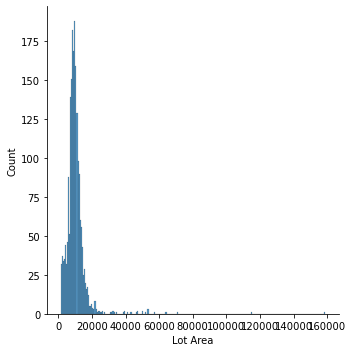

In [218]:
sns.displot(traindata_mod['Lot Area'])

#### Perform log transformation

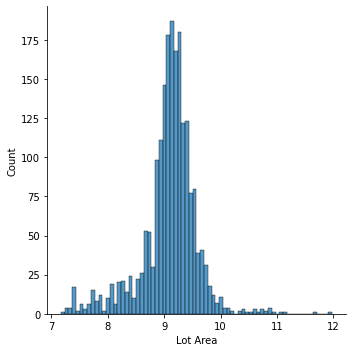

In [219]:
sns.displot(np.log(traindata_mod['Lot Area']));

Replace highly skewed & high kurtosis data with log scaled data.

In [220]:
traindata_mod['Lot Area_log'] = np.log(traindata_mod['Lot Area'])

In [221]:
traindata_mod = traindata_mod.drop(columns=['Lot Area'])

In [222]:
traindata_mod.isnull().sum().sum()

0

In [223]:
final_train = traindata_mod

#### Output dataframes to csv files

In [224]:
final_train.to_csv('./datasets/final_train.csv', index=False)

## Cleaned training data has been output to csv

#### Part 2 will be cleaning test dataset for prediction later in modeling.